In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense

In [ ]:
from google.colab import drive     #Mounting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Datasets/PreprocessedDatawithoutPortmapandUDPLag.csv"
df = pd.read_csv(path)
df.head(10)

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,0,1.235437,0.170714,-0.596256,-1.833680,-0.749446,-0.981775,-0.957622,-0.969039,-0.060374,...,-0.109588,-0.955275,-0.969039,-0.001603,-0.749446,-0.109755,-0.062262,-0.177089,0.212635,-0.546726
1,1,0.189947,0.170714,-1.609139,-1.833680,-0.757239,-0.981775,-0.957622,-0.969039,-0.060374,...,-0.109588,-0.954624,-0.969039,-0.001603,-0.757239,6.577541,-0.062262,-0.177089,0.212635,-0.546726
2,2,1.037071,0.170714,-0.549644,-1.833680,-0.749446,-0.981775,-0.957622,-0.969039,-0.060374,...,-0.109588,-0.955275,-0.969039,-0.001603,-0.749446,-0.109755,-0.062262,-0.177089,0.212635,-0.546726
3,3,0.732936,0.170714,-1.545618,-1.833680,-0.749446,-0.981775,-0.957622,-0.969039,-0.060374,...,-0.109588,-0.955275,-0.969039,-0.001603,-0.749446,-0.109755,-0.062262,-0.177089,0.212635,-0.546726
4,4,-1.069485,0.170714,0.176099,0.542710,-0.467597,-0.547587,-0.522259,-0.532105,-0.092364,...,-0.109588,-0.517387,-0.532105,-0.103552,-0.467597,-0.400297,-0.062697,-0.177089,0.212635,-0.546726
5,5,-1.069485,-0.589100,0.176099,0.542710,-0.467597,-0.547587,-0.522259,-0.532105,-0.092364,...,-0.109588,-0.517387,-0.532105,-0.103552,-0.467597,-0.400297,-0.062697,-0.177089,-4.702891,-0.546726
6,6,0.177837,0.170714,-1.609189,-1.833680,1.075431,0.268218,-0.969336,-0.801673,5.111332,...,-0.109588,-0.808025,-0.801673,2.267134,1.075431,7.876903,0.045162,-0.177089,0.212635,-0.546726
7,7,-1.095907,0.170714,-1.610306,-3.129893,-0.765032,-0.993457,-0.969336,-0.980795,-0.092364,...,-0.109588,-0.964384,-0.980795,-0.103552,-0.765032,-0.400297,-0.062697,3.620962,0.212635,-0.546726
8,8,0.177837,0.170714,-1.609189,-1.833680,-0.731262,-0.892212,-0.867816,-0.878909,-0.092364,...,9.125089,-0.896716,-0.878909,-0.103552,-0.731262,-0.326599,0.045162,-0.177089,0.212635,-0.546726
9,9,-1.095010,-0.589100,-0.024111,-1.833680,-0.765032,-0.993457,-0.969336,-0.980795,-0.060374,...,9.125089,-0.959179,-0.980795,-0.001603,-0.765032,-0.330000,-0.062262,-0.177089,-4.702891,-0.546726


In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1])) #Starting data preprocessing 
#Data domensions

This Dataset has 1056965 rows and 36 columns


In [ ]:
df.info()   #Data Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056965 entries, 0 to 1056964
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1056965 non-null  int64  
 1    Source Port                 1056965 non-null  float64
 2    Destination IP              1056965 non-null  float64
 3    Destination Port            1056965 non-null  float64
 4    Protocol                    1056965 non-null  float64
 5   Total Length of Fwd Packets  1056965 non-null  float64
 6    Fwd Packet Length Max       1056965 non-null  float64
 7    Fwd Packet Length Min       1056965 non-null  float64
 8    Fwd Packet Length Mean      1056965 non-null  float64
 9   Bwd Packet Length Max        1056965 non-null  float64
 10   Bwd Packet Length Min       1056965 non-null  float64
 11   Bwd Packet Length Mean      1056965 non-null  float64
 12   Bwd Packet Length Std       1056965 non-n

In [ ]:
df.describe()  #Descriptive statistics of dataset

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,...,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06,1.056965e+06
mean,5.642132e+05,-1.313744e-13,-7.965723e-13,8.481232e-15,1.045864e-11,-1.586020e-12,4.656492e-13,2.367352e-12,-2.301816e-12,-2.805767e-13,...,2.924145e-13,2.539900e-12,-2.301816e-12,9.736473e-13,-1.586020e-12,3.344034e-12,4.422064e-13,-6.786121e-13,-1.449594e-12,2.233949e-12
std,3.594286e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000e+00,-1.095907e+00,-6.789308e+00,-1.610306e+00,-3.129893e+00,-7.650321e-01,-9.934575e-01,-9.693358e-01,-9.807954e-01,-9.236375e-02,...,-1.095879e-01,-9.643840e-01,-9.807954e-01,-1.035519e-01,-7.650321e-01,-4.002974e-01,-6.269675e-02,-1.770887e-01,-4.702891e+00,-1.851070e+00
25%,2.642410e+05,-1.059781e+00,1.707136e-01,-8.740019e-01,5.427104e-01,-4.909759e-01,-5.826340e-01,-5.574008e-01,-5.673735e-01,-9.236375e-02,...,-1.095879e-01,-5.525223e-01,-5.673735e-01,-1.035519e-01,-4.909759e-01,-4.002974e-01,-6.269675e-02,-1.770887e-01,2.126349e-01,-5.467259e-01
50%,5.284820e+05,-1.053973e-02,1.707136e-01,1.784655e-03,5.427104e-01,-2.441954e-01,-2.477448e-01,-3.250772e-01,-2.764106e-01,-9.236375e-02,...,-1.095879e-01,-3.892091e-01,-2.764106e-01,-1.035519e-01,-2.441954e-01,-4.002974e-01,-6.269675e-02,-1.770887e-01,2.126349e-01,1.054462e-01
75%,7.927230e+05,9.837790e-01,1.707136e-01,8.734075e-01,5.427104e-01,3.870430e-01,1.027207e-01,1.102854e-01,1.046821e-01,-9.236375e-02,...,-1.095879e-01,1.169969e-01,1.046821e-01,-1.035519e-01,3.870430e-01,-4.002974e-01,-6.269675e-02,-1.770887e-01,2.126349e-01,7.576183e-01
max,1.245797e+06,1.576187e+00,2.507689e+00,1.717307e+00,5.427104e-01,1.346551e+02,6.064528e+00,3.191013e+00,3.194570e+00,1.924555e+01,...,9.125089e+00,1.908888e+00,3.194570e+00,3.134382e+01,1.346551e+02,1.817628e+01,2.843984e+01,5.449368e+01,2.126349e-01,1.409790e+00


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
#Separating input and output attributes
x = df.drop(['Label'], axis=1)
y = df['Label']

In [ ]:
#normalized_x.describe() 
y.describe()

count    1.056965e+06
mean     2.233949e-12
std      1.000000e+00
min     -1.851070e+00
25%     -5.467259e-01
50%      1.054462e-01
75%      7.576183e-01
max      1.409790e+00
Name: Label, dtype: float64

In [ ]:
#normalized_x.info()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056965 entries, 0 to 1056964
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1056965 non-null  float64
 1    Destination IP              1056965 non-null  float64
 2    Destination Port            1056965 non-null  float64
 3    Protocol                    1056965 non-null  float64
 4   Total Length of Fwd Packets  1056965 non-null  float64
 5    Fwd Packet Length Max       1056965 non-null  float64
 6    Fwd Packet Length Min       1056965 non-null  float64
 7    Fwd Packet Length Mean      1056965 non-null  float64
 8   Bwd Packet Length Max        1056965 non-null  float64
 9    Bwd Packet Length Min       1056965 non-null  float64
 10   Bwd Packet Length Mean      1056965 non-null  float64
 11   Bwd Packet Length Std       1056965 non-null  float64
 12   Flow IAT Mean               1056965 non-n

In [ ]:
y.nunique()

6

In [ ]:
y = pd.get_dummies(y,prefix=['Label'])
y.head()

,['Label']_-1.851069986780666,['Label']_-1.198897923921457,['Label']_-0.5467258610622483,['Label']_0.1054462017969605,['Label']_0.7576182646561693,['Label']_1.409790327515378
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [ ]:
#Fitting unique values from each column of features
print(df.apply(lambda col: col.unique()))

 Source Port                   [1.235437092670535, 0.1899468181594567, 1.0370...
 Destination IP                [0.1707136410732992, -0.589100219055412, 0.170...
 Destination Port              [-0.59625648750918, -1.6091385309877149, -0.54...
 Protocol                      [-1.8336802082721888, 0.5427104161649716, -3.1...
Total Length of Fwd Packets    [-0.7494459183456488, -0.757238985481054, -0.4...
 Fwd Packet Length Max         [-0.9817753018470208, -0.5475874931435536, 0.2...
 Fwd Packet Length Min         [-0.957622007040838, -0.5222593735704891, -0.9...
 Fwd Packet Length Mean        [-0.9690393038552636, -0.5321052395041811, -0....
Bwd Packet Length Max          [-0.0603738130786713, -0.0923637464953711, 5.1...
 Bwd Packet Length Min         [0.2937406925291177, -0.1502897459170855, 9.32...
 Bwd Packet Length Mean        [-0.0016027692119172, -0.1035518649458163, 2.2...
 Bwd Packet Length Std         [-0.0832332425120446, 5.233254247807087, 4.502...
 Flow IAT Mean              

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)


(792723, 34) (264242, 34)


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(792723, 34, 1), ytrain=(792723, 6), xtest=(264242, 34, 1), ytest=(264242, 6)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import numpy as np
np.random.seed(0)

In [ ]:
# Define the model
from keras import optimizers
m2 = keras.Sequential()
m2.add(Convolution1D(64, 3, activation="relu", input_shape=(34,1)))
m2.add(Convolution1D(32, 3, activation="relu"))
m2.add(MaxPooling1D(pool_size=2))
m2.add(Flatten())
m2.add(Dense(15,activation="relu", name="Hidden_layer_1"))
m2.add(Dense(10,activation="relu", name="Hidden_layer_2"))
m2.add(Dense(6,activation="softmax", name="Output_layer"))
m2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 32, 64)            256       
                                                                 
 conv1d_9 (Conv1D)           (None, 30, 32)            6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 480)               0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 15)                7215      
                                                                 
 Hidden_layer_2 (Dense)      (None, 10)                160       
                                                      

In [ ]:
#compile the model
m2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
History_org=m2.fit(X_train, y_train, epochs=20, batch_size=2000, validation_data=(X_test, y_test))

Epoch 1/20
397/397 [==============================] - 60s 148ms/step - loss: 0.2484 - accuracy: 0.9159 - val_loss: 0.0636 - val_accuracy: 0.9770
Epoch 2/20
397/397 [==============================] - 57s 144ms/step - loss: 0.0525 - accuracy: 0.9822 - val_loss: 0.0506 - val_accuracy: 0.9820
Epoch 3/20
397/397 [==============================] - 57s 143ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0406 - val_accuracy: 0.9883
Epoch 4/20
397/397 [==============================] - 57s 143ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 5/20
397/397 [==============================] - 57s 143ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0424 - val_accuracy: 0.9853
Epoch 6/20
397/397 [==============================] - 57s 143ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 7/20
397/397 [==============================] - 56s 142ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0329 - val_ac

In [ ]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 32, 64)            256       
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 480)               0         
                                                                 
 dense_3 (Dense)             (None, 15)                7215      
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                      

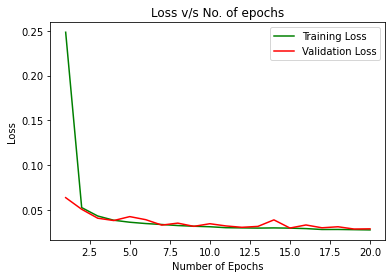

In [ ]:
#Plotting Loss v/s Epochs
loss = History_org.history['loss']
val_loss = History_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

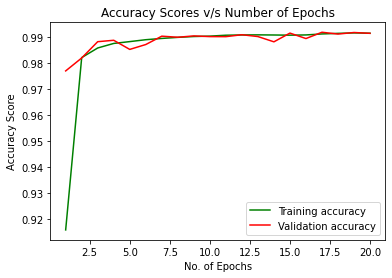

In [ ]:
#Plotting Accuracy v/s Epochs
loss = History_org.history['accuracy']
val_loss = History_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [ ]:
Classifier_accuracy=[]
loss, accuracy = m2.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f'%  (accuracy*100))
Classifier_accuracy.append(accuracy*100)

8258/8258 [==============================] - 23s 3ms/step - loss: 0.0287 - accuracy: 0.9915
Accuracy of Deep neural Network : 99.15


In [ ]:
y_pred = m2.predict(X_test)

In [ ]:
a =(y_pred > 0.5)
b = (y_test > 0.5) 
a=np.argmax(y_pred, axis=1)
b=np.argmax(y_test, axis=1)

In [ ]:
#Previously known testing array
b[:110]

array([2, 5, 2, 3, 0, 3, 1, 1, 4, 4, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1,
       1, 2, 4, 5, 2, 4, 2, 4, 5, 5, 1, 2, 2, 1, 2, 2, 4, 5, 0, 3, 1, 1,
       1, 5, 1, 2, 1, 2, 1, 3, 5, 3, 2, 1, 0, 1, 5, 4, 4, 5, 2, 5, 4, 3,
       0, 5, 2, 2, 4, 4, 1, 2, 2, 1, 2, 1, 1, 3, 5, 5, 2, 4, 2, 2, 0, 3,
       1, 4, 2, 2, 0, 4, 2, 5, 5, 4, 1, 5, 2, 3, 2, 4, 2, 3, 5, 3, 5, 1])

In [ ]:
#Prediction array
a[:110]

array([2, 5, 2, 3, 0, 3, 1, 1, 4, 4, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 5, 1,
       1, 2, 4, 5, 2, 4, 2, 4, 5, 5, 1, 2, 2, 1, 2, 2, 4, 5, 0, 3, 1, 1,
       1, 5, 1, 2, 1, 2, 1, 3, 5, 3, 2, 1, 0, 1, 5, 4, 4, 5, 2, 5, 4, 3,
       0, 5, 2, 2, 4, 4, 1, 2, 2, 1, 2, 1, 1, 3, 5, 5, 2, 4, 2, 2, 0, 3,
       1, 4, 2, 2, 0, 4, 2, 5, 5, 4, 1, 3, 2, 3, 2, 4, 2, 3, 5, 3, 5, 1])

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Convolution Neural Network')

print('Accuracy: %f' % (accuracy_score(a, b)*100))
print("Confusion Matrix =\n", metrics.confusion_matrix(b, a, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(b, a, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(b, a, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(a, b, average='macro'))

Convolution Neural Network
Accuracy: 99.147751
Confusion Matrix =
 [[14430     1     0     0     3     0]
 [    7 49730     5     8     1     4]
 [    3     8 49834    48     6     0]
 [    4     0    46 48897     1  1220]
 [    3     0     0     6 49881     1]
 [    1     3     1   871     1 49218]]
Recall = 0.9914775092528818
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14434
           1       1.00      1.00      1.00     49755
           2       1.00      1.00      1.00     49899
           3       0.98      0.97      0.98     50168
           4       1.00      1.00      1.00     49891
           5       0.98      0.98      0.98     50095

    accuracy                           0.99    264242
   macro avg       0.99      0.99      0.99    264242
weighted avg       0.99      0.99      0.99    264242

F1 Score =  0.9924209089793093
